# Exploratory Data Analysis (EDA)
## Restaurant Sales Dataset

This notebook explores the restaurant sales dataset to understand:
- Product distribution and sales patterns
- Sauce popularity and co-occurrence
- Cart composition analysis
- Time-based patterns

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path for imports
sys.path.insert(0, str(Path.cwd().parent / 'src'))
from data_loader import load_raw_data, get_data_stats, SAUCES

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)

## 1. Load and Overview the Data

In [2]:
# Load data
DATA_PATH = Path('../data/raw/ap_dataset.csv')
df = load_raw_data(DATA_PATH)

# Basic info
print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (28039, 18)

Columns:
pl_gest                           int64
data_bon                 datetime64[ns]
id_gest                           int64
anluna                            int64
pct_lcr                           int64
id                                int64
pl_pr                             int64
id_pr                             int64
pl_bon                            int64
id_bon                            int64
retail_product_id                 int64
ProductCode                      object
UnitMeasure                      object
SalePrice                       float64
SalePriceWithVAT                float64
ManagementWorkplaceId             int64
ManagementId                      int64
retail_product_name              object
dtype: object

First 5 rows:


,pl_gest,data_bon,id_gest,anluna,pct_lcr,id,pl_pr,id_pr,pl_bon,id_bon,retail_product_id,ProductCode,UnitMeasure,SalePrice,SalePriceWithVAT,ManagementWorkplaceId,ManagementId,retail_product_name
0,1,2025-09-05 12:04:19.553,1,202509,1,53353,1,9,1,35214,10156,JAA,BUC,1.65,2.0,1,1,Packaging
1,1,2025-09-05 12:04:19.553,1,202509,1,53349,1,54,1,35214,112,EBA,BUC,26.04,28.9,1,1,Crazy Schnitzel
2,1,2025-09-05 12:04:19.553,1,202509,1,53352,1,71,1,35214,131,EBA,BUC,6.22,6.9,1,2,Crazy Sauce
3,1,2025-09-05 12:04:19.553,1,202509,1,53351,1,93,1,35214,143,GAA,BUC,8.56,9.5,1,1,Aqua Carpatica Plata 0.5L
4,1,2025-09-05 12:04:19.553,1,202509,1,53350,1,10109,1,35214,10165,EBA,BUC,29.64,32.9,1,2,Mac & cheease


In [3]:
# Quick statistics
stats = get_data_stats(df)
print("=" * 50)
print("DATASET STATISTICS")
print("=" * 50)
for key, value in stats.items():
    print(f"{key:20s}: {value}")

DATASET STATISTICS
total_rows          : 28039
unique_receipts     : 7869
unique_products     : 59
date_range          : (Timestamp('2025-09-05 12:04:19.553000'), Timestamp('2025-12-03 11:04:19.420000'))
avg_cart_size       : 3.5632227729063413


## 2. Product Analysis

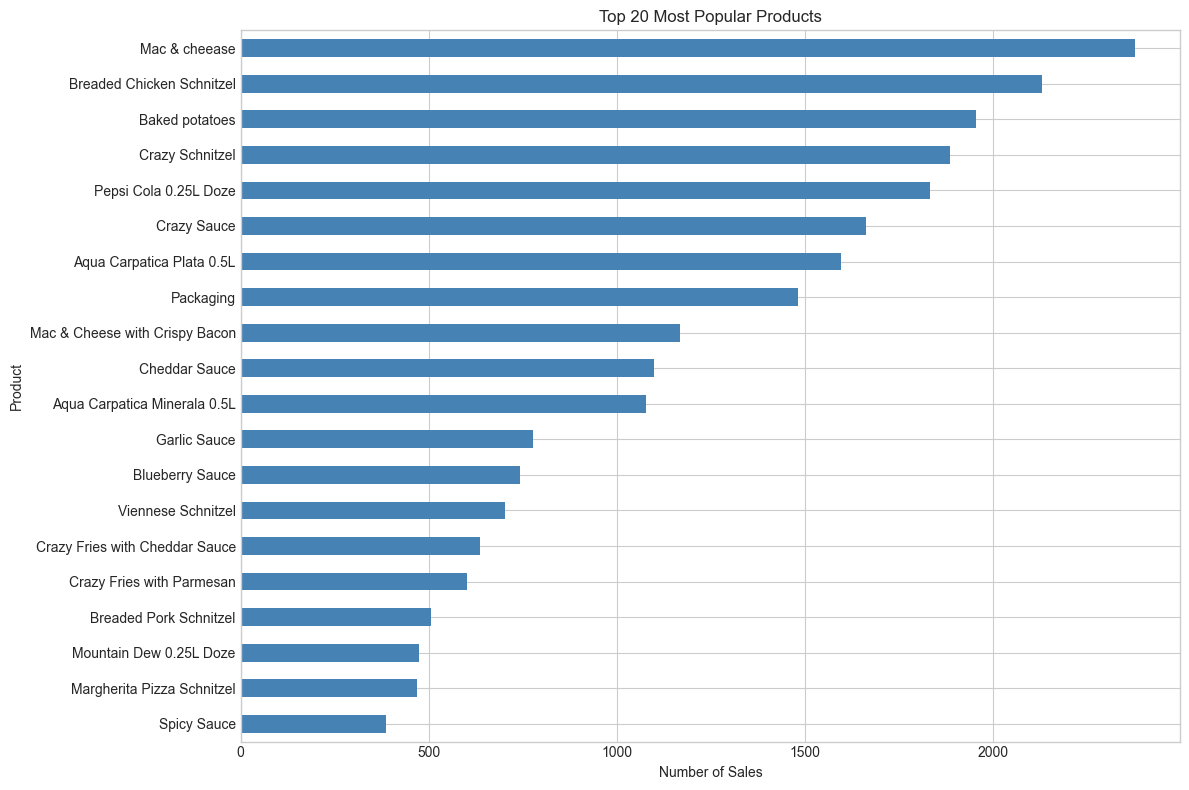

In [4]:
# Product frequency
product_counts = df['retail_product_name'].value_counts()

# Plot top 20 products
fig, ax = plt.subplots(figsize=(12, 8))
product_counts.head(20).plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Product')
ax.set_title('Top 20 Most Popular Products')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../results/top_products.png', dpi=150, bbox_inches='tight')
plt.show()

In [5]:
# Identify product categories
def categorize_product(name):
    name_lower = name.lower()
    if 'sauce' in name_lower:
        return 'Sauce'
    elif 'schnitzel' in name_lower:
        return 'Schnitzel'
    elif any(x in name_lower for x in ['fries', 'potatoes', 'baked']):
        return 'Sides'
    elif any(x in name_lower for x in ['pepsi', 'cola', 'aqua', '7up', 'lipton', 'mirinda', 'dew', 'prigat']):
        return 'Drinks'
    elif 'salad' in name_lower:
        return 'Salad'
    elif 'mac' in name_lower:
        return 'Mac & Cheese'
    else:
        return 'Other'

df['category'] = df['retail_product_name'].apply(categorize_product)

# Category distribution
category_counts = df['category'].value_counts()
print("Product Categories:")
print(category_counts)

Product Categories:
category
Schnitzel       6978
Sauce           6117
Drinks          5962
Mac & Cheese    3546
Sides           2918
Other           2312
Salad            206
Name: count, dtype: int64


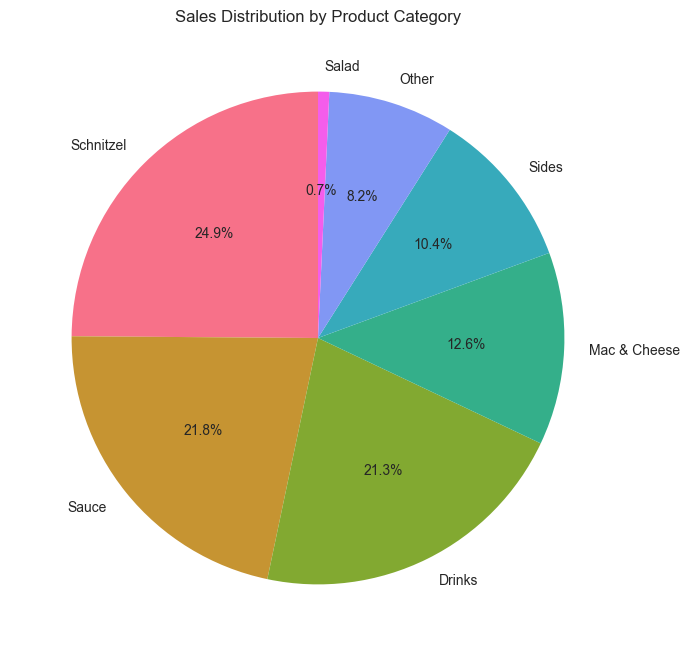

In [6]:
# Category pie chart
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette('husl', len(category_counts))
ax.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
       colors=colors, startangle=90)
ax.set_title('Sales Distribution by Product Category')
plt.savefig('../results/category_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Sauce Analysis

In [7]:
# Filter to standalone sauces
sauce_df = df[df['retail_product_name'].isin(SAUCES)]
sauce_counts = sauce_df['retail_product_name'].value_counts()

print("Sauce Sales:")
print(sauce_counts)
print(f"\nTotal sauce sales: {len(sauce_df)} ({100*len(sauce_df)/len(df):.1f}% of all sales)")

Sauce Sales:
retail_product_name
Crazy Sauce            1662
Cheddar Sauce          1100
Garlic Sauce            778
Blueberry Sauce         743
Spicy Sauce             386
Tomato Sauce            212
Pink Sauce              147
Extra Cheddar Sauce      24
Name: count, dtype: int64

Total sauce sales: 5052 (18.0% of all sales)


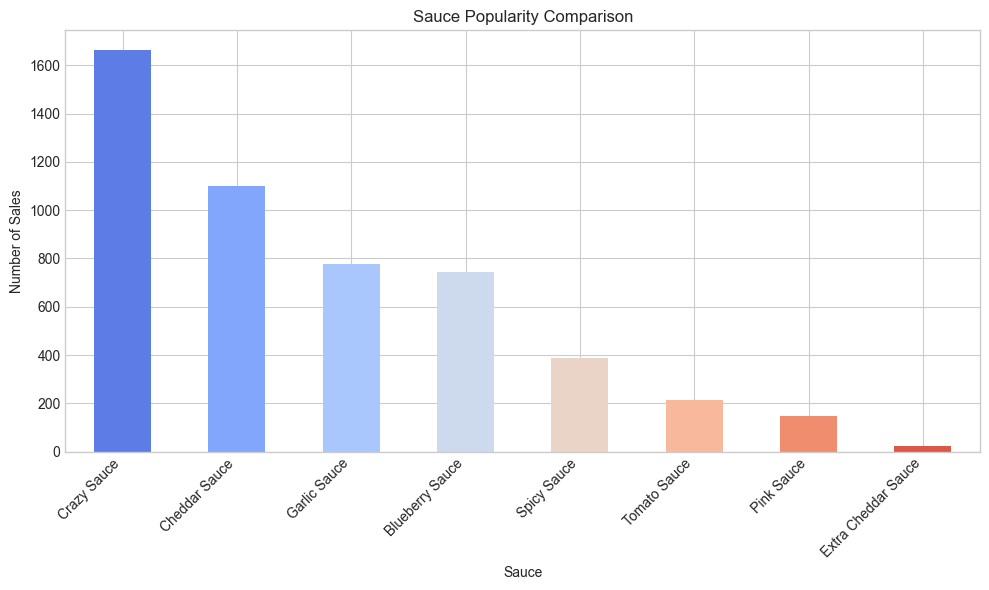

In [8]:
# Sauce popularity bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette('coolwarm', len(sauce_counts))
sauce_counts.plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel('Sauce')
ax.set_ylabel('Number of Sales')
ax.set_title('Sauce Popularity Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../results/sauce_popularity.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Cart Analysis

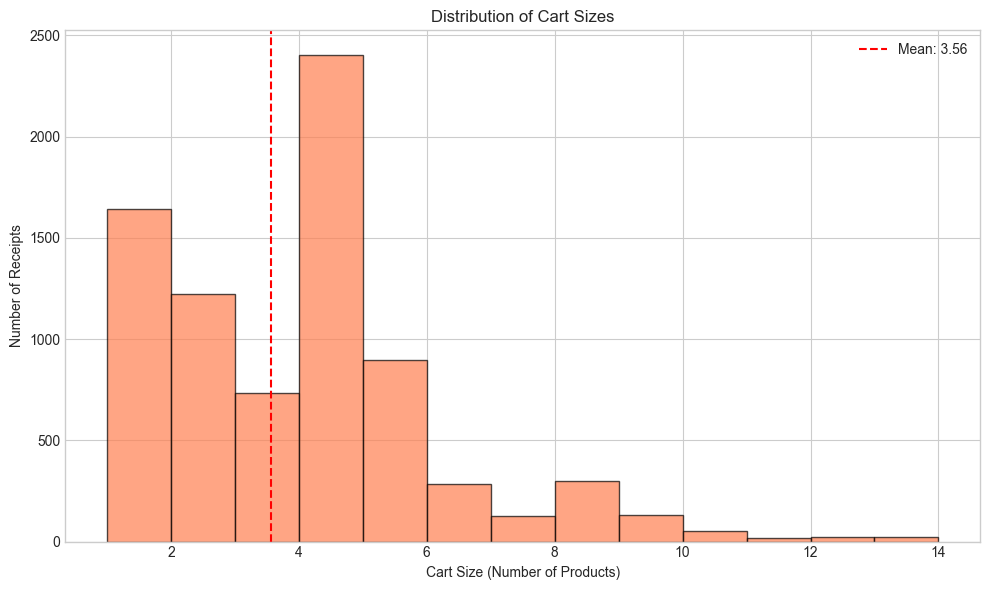

Cart Size Statistics:
count    7869.000000
mean        3.563223
std         2.212348
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max        26.000000
dtype: float64


In [9]:
# Cart size distribution
cart_sizes = df.groupby('id_bon').size()

fig, ax = plt.subplots(figsize=(10, 6))
cart_sizes.hist(bins=range(1, 15), ax=ax, color='coral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Cart Size (Number of Products)')
ax.set_ylabel('Number of Receipts')
ax.set_title('Distribution of Cart Sizes')
ax.axvline(cart_sizes.mean(), color='red', linestyle='--', label=f'Mean: {cart_sizes.mean():.2f}')
ax.legend()
plt.tight_layout()
plt.savefig('../results/cart_size_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Cart Size Statistics:")
print(cart_sizes.describe())

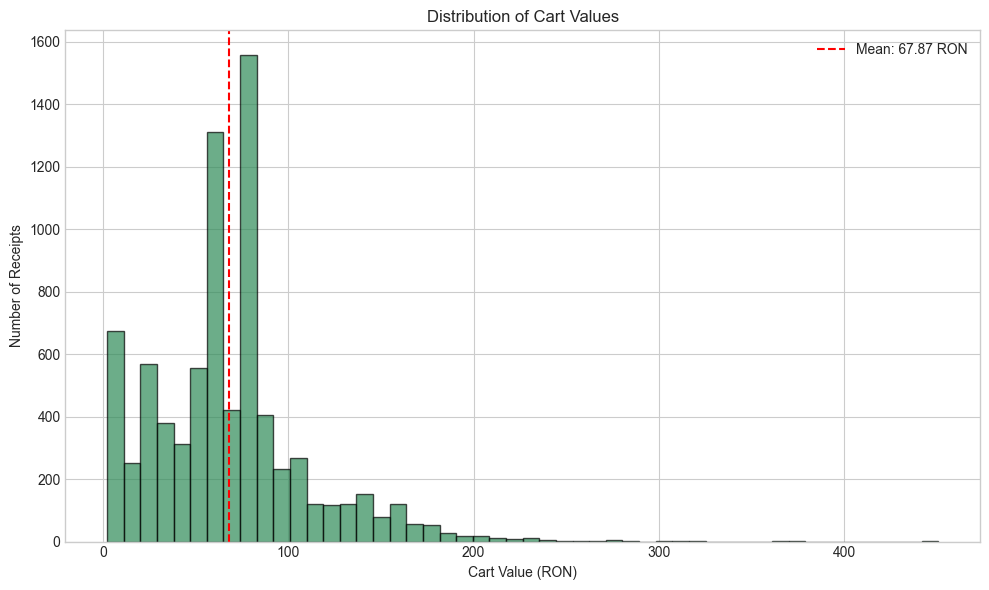

In [10]:
# Cart value distribution
cart_values = df.groupby('id_bon')['SalePriceWithVAT'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
cart_values.hist(bins=50, ax=ax, color='seagreen', edgecolor='black', alpha=0.7)
ax.set_xlabel('Cart Value (RON)')
ax.set_ylabel('Number of Receipts')
ax.set_title('Distribution of Cart Values')
ax.axvline(cart_values.mean(), color='red', linestyle='--', label=f'Mean: {cart_values.mean():.2f} RON')
ax.legend()
plt.tight_layout()
plt.savefig('../results/cart_value_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Product Co-occurrence Analysis

In [11]:
# Create co-occurrence matrix for top products
top_products = product_counts.head(15).index.tolist()

# Create binary matrix
receipt_products = df.groupby('id_bon')['retail_product_name'].apply(list)

cooccurrence = pd.DataFrame(0, index=top_products, columns=top_products)

for products in receipt_products:
    for p1 in products:
        if p1 in top_products:
            for p2 in products:
                if p2 in top_products:
                    cooccurrence.loc[p1, p2] += 1

# Normalize by diagonal (self-occurrence = total count)
cooccurrence_pct = cooccurrence.copy()
for col in cooccurrence_pct.columns:
    cooccurrence_pct[col] = cooccurrence_pct[col] / cooccurrence.loc[col, col] * 100

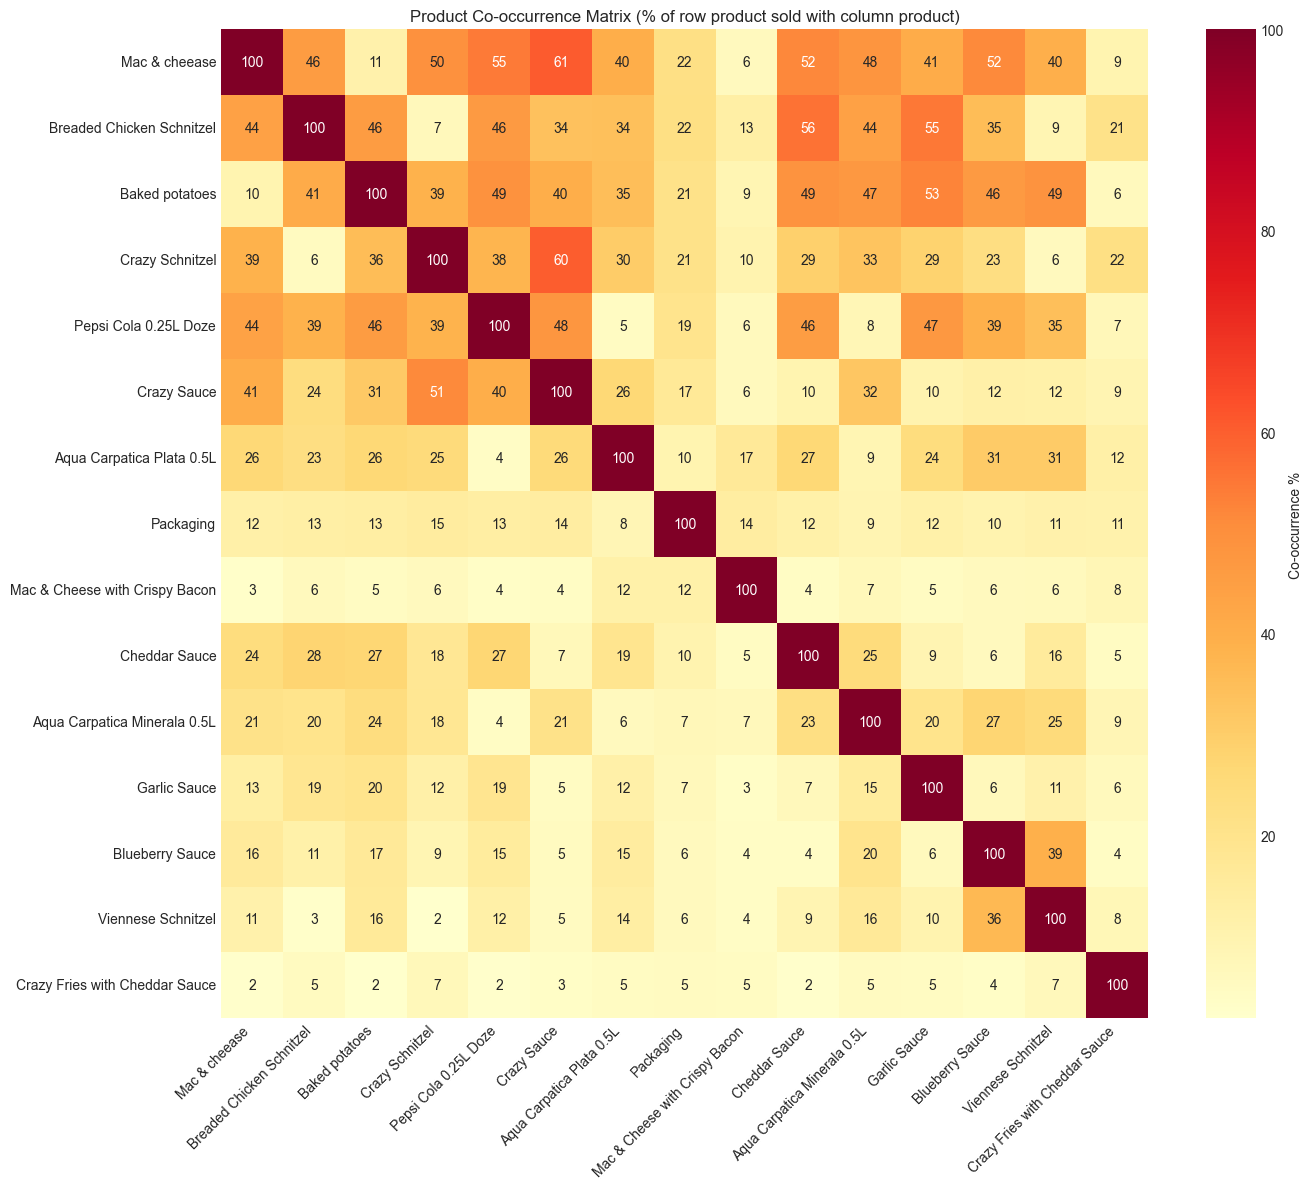

In [12]:
# Heatmap of co-occurrence
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cooccurrence_pct, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax,
            cbar_kws={'label': 'Co-occurrence %'})
ax.set_title('Product Co-occurrence Matrix (% of row product sold with column product)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../results/cooccurrence_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Crazy Schnitzel + Crazy Sauce Analysis

Key relationship for LR#1 model.

In [13]:
# Receipts with Crazy Schnitzel
crazy_schnitzel_receipts = df[df['retail_product_name'] == 'Crazy Schnitzel']['id_bon'].unique()
print(f"Receipts with Crazy Schnitzel: {len(crazy_schnitzel_receipts)}")

# Of those, how many also have Crazy Sauce?
crazy_sauce_receipts = df[df['retail_product_name'] == 'Crazy Sauce']['id_bon'].unique()
both = np.intersect1d(crazy_schnitzel_receipts, crazy_sauce_receipts)

print(f"Receipts with both Crazy Schnitzel AND Crazy Sauce: {len(both)}")
print(f"Conversion rate: {100 * len(both) / len(crazy_schnitzel_receipts):.1f}%")

Receipts with Crazy Schnitzel: 1783
Receipts with both Crazy Schnitzel AND Crazy Sauce: 948
Conversion rate: 53.2%


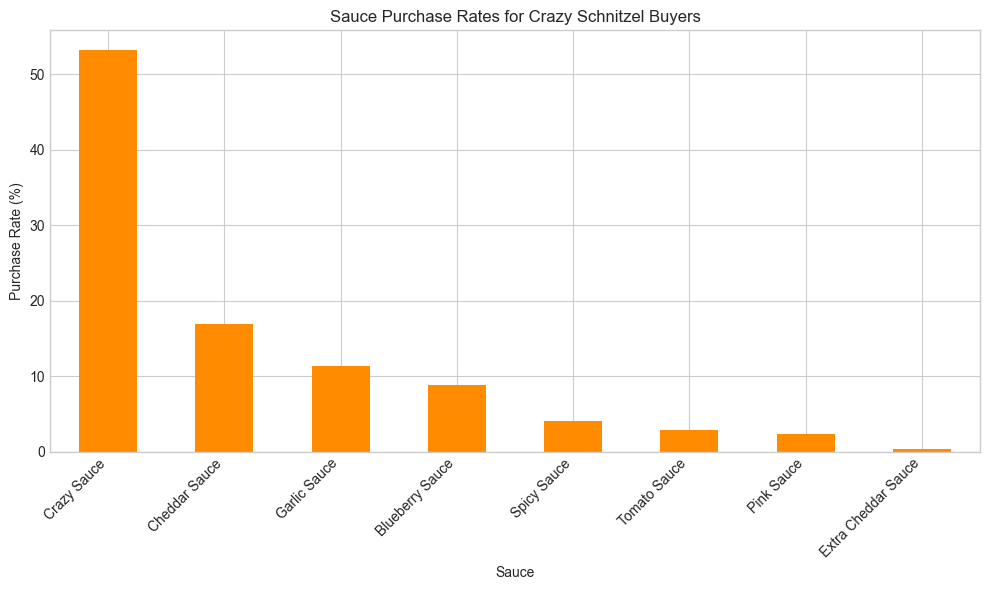

In [14]:
# Sauce purchase rates for Crazy Schnitzel buyers
cs_df = df[df['id_bon'].isin(crazy_schnitzel_receipts)]

sauce_rates = {}
for sauce in SAUCES:
    sauce_receipts = cs_df[cs_df['retail_product_name'] == sauce]['id_bon'].nunique()
    sauce_rates[sauce] = sauce_receipts / len(crazy_schnitzel_receipts) * 100

sauce_rates_df = pd.Series(sauce_rates).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sauce_rates_df.plot(kind='bar', ax=ax, color='darkorange')
ax.set_xlabel('Sauce')
ax.set_ylabel('Purchase Rate (%)')
ax.set_title('Sauce Purchase Rates for Crazy Schnitzel Buyers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../results/sauce_rates_crazy_schnitzel.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Time-Based Analysis

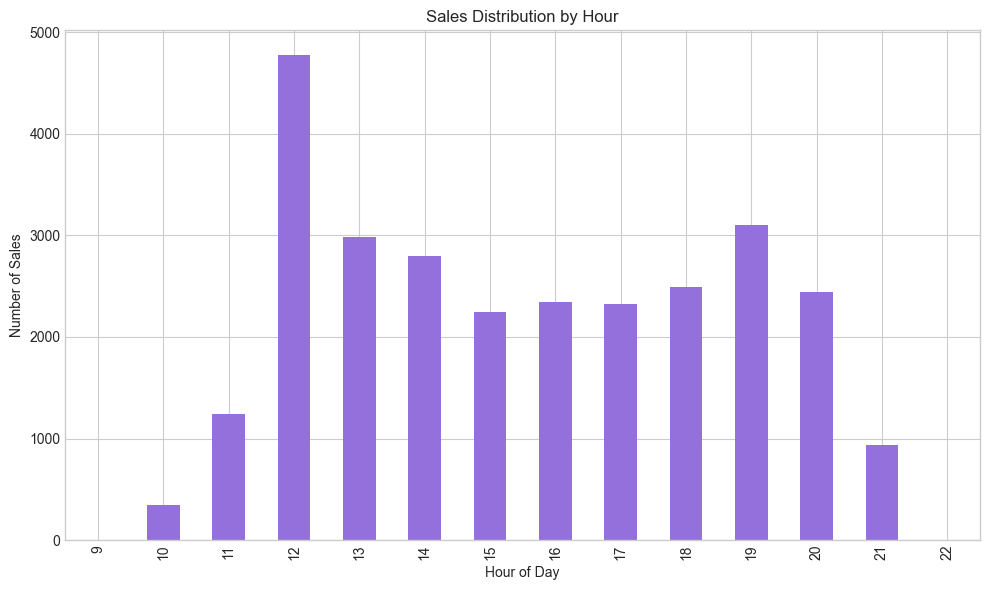

In [15]:
# Extract time features
df['hour'] = df['data_bon'].dt.hour
df['day_of_week'] = df['data_bon'].dt.dayofweek
df['date'] = df['data_bon'].dt.date

# Sales by hour
hourly_sales = df.groupby('hour').size()

fig, ax = plt.subplots(figsize=(10, 6))
hourly_sales.plot(kind='bar', ax=ax, color='mediumpurple')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Sales')
ax.set_title('Sales Distribution by Hour')
plt.tight_layout()
plt.savefig('../results/hourly_sales.png', dpi=150, bbox_inches='tight')
plt.show()

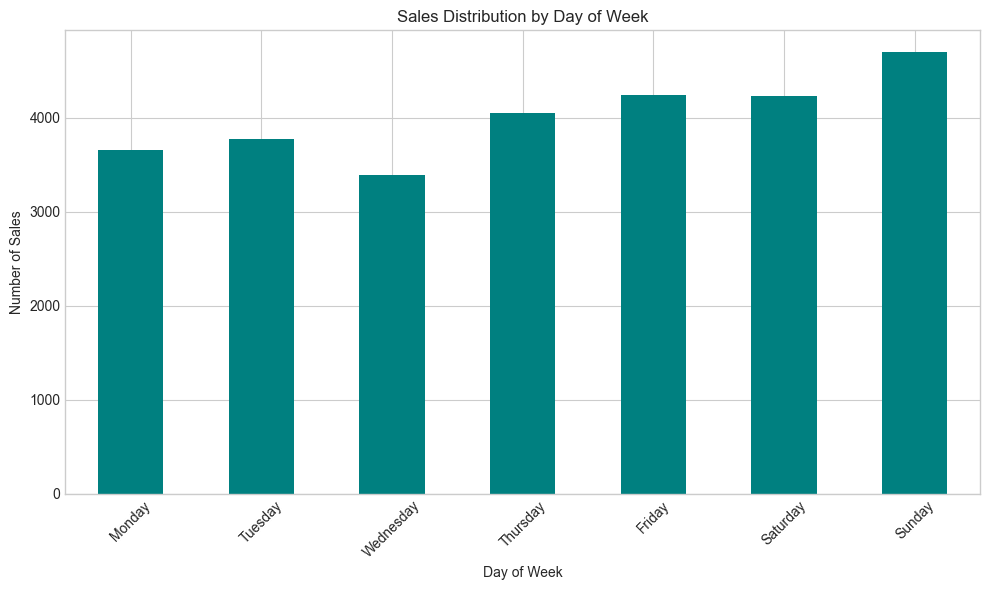

In [16]:
# Sales by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('day_of_week').size()
daily_sales.index = [day_names[i] for i in daily_sales.index]

fig, ax = plt.subplots(figsize=(10, 6))
daily_sales.plot(kind='bar', ax=ax, color='teal')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Sales')
ax.set_title('Sales Distribution by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/daily_sales.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Summary Statistics

In [17]:
print("=" * 60)
print("EDA SUMMARY")
print("=" * 60)
print(f"\nDataset: {len(df)} rows, {df['id_bon'].nunique()} receipts")
print(f"Period: {df['data_bon'].min().date()} to {df['data_bon'].max().date()}")
print(f"\nProduct Categories: {df['category'].nunique()}")
print(f"Most popular category: {category_counts.index[0]} ({category_counts.values[0]} sales)")
print(f"\nSauces available: {len(SAUCES)}")
print(f"Most popular sauce: {sauce_counts.index[0]} ({sauce_counts.values[0]} sales)")
print(f"\nAverage cart size: {cart_sizes.mean():.2f} products")
print(f"Average cart value: {cart_values.mean():.2f} RON")
print(f"\nCrazy Schnitzel -> Crazy Sauce conversion: {100 * len(both) / len(crazy_schnitzel_receipts):.1f}%")
print("=" * 60)

EDA SUMMARY

Dataset: 28039 rows, 7869 receipts
Period: 2025-09-05 to 2025-12-03

Product Categories: 7
Most popular category: Schnitzel (6978 sales)

Sauces available: 8
Most popular sauce: Crazy Sauce (1662 sales)

Average cart size: 3.56 products
Average cart value: 67.87 RON

Crazy Schnitzel -> Crazy Sauce conversion: 53.2%
